***Image Classifier Project***

In [4]:
%pip install -r ../requirements.txt
!pip install scipy tensorflow
!pip install matplotlib


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


***Step 2***

# importar librerias:
from tensorflow import keras
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from matplotlib import pyplot
from matplotlib.image import imread

In [5]:
# importar librerias:
from tensorflow import keras
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from matplotlib import pyplot
from matplotlib.image import imread

2022-08-07 19:05:54.922383: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-07 19:05:54.922432: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# esto es para cargar el zip pero yo lo arme como Sub_train y Sub_test
#import shutil

#filename = "../data/raw/test1.zip"
#filename1 = "../data/raw/train.zip"
#extract_dir = "../data/raw/test1"
#extract_dir1 = "../data/raw/train"
#archive_format = "zip"

# Unpack the archive file
#shutil.unpack_archive(filename, extract_dir, archive_format)
#shutil.unpack_archive(filename1, extract_dir1, archive_format)

***Step3***

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/train/sub_train/cat/cat.11.jpg'

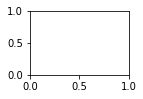

In [6]:
# plot cat photos from the dogs vs cats dataset
# define location of dataset
folder = "../data/raw/train/sub_train/cat/"
#extract_dir1 = "../data/raw/test"
#folder = 'train/'
# plot first few images
for i in range(11,20):
# define subplot
    pyplot.subplot(330 + 1 + i-11)
    # define filename
    filename = folder + 'cat.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
    # show the figure
    pyplot.show()

In [ ]:
# plot dog photos from the dogs vs cats dataset
# define location of dataset
folder = "../data/raw/train/sub_train/dog/"
#extract_dir1 = "../data/raw/test"
#folder = 'train/'
# plot first few images
for i in range(0,9):
# define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'dog.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
    # show the figure
    pyplot.show()

***Step4***

In [ ]:
# Use the ImageDataGenerator to load the data

trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="../data/raw/train/sub_train/",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="../data/raw/train/sub_test/", target_size=(224,224))

***Step5***

In [ ]:
# pasar la data por la red neuronal
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

***Step6***

In [ ]:
# Pasar la data por la capa densa 
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

***Step7***

In [ ]:
# compilar el modelo:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

***Step8***

In [ ]:
# obtener el resumen del modelo:
model.summary()

***Step9***

In [ ]:
# Create objects for ModelCheckpoint and EarlyStopping, and pass them as callback functions to fit_generator
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])
